In [12]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
import xgboost as xgb
%matplotlib inline

In [14]:
X_50_open = np.load('./Np_files/open_50.npy')
X_25_open = np.load('./Np_files/open_25.npy')
X_13_open = np.load('./Np_files/open_13.npy')
X_7_open = np.load('./Np_files/open_7.npy')
open_target = np.ones(X_50_open.shape[0])

X_50_close = np.load('./Np_files/close_50.npy')
X_25_close = np.load('./Np_files/close_25.npy')
X_13_close = np.load('./Np_files/close_13.npy')
X_7_close = np.load('./Np_files/close_7.npy')
close_target = np.zeros(X_50_close.shape[0])

targets = np.concatenate((open_target, close_target))

X_50 = np.concatenate((X_50_open, X_50_close))
X_25 = np.concatenate((X_25_open, X_25_close))
X_13 = np.concatenate((X_13_open, X_13_close))
X_7 = np.concatenate((X_7_open, X_7_close))

In [15]:
from sklearn.model_selection import train_test_split

X_50_train, X_50_test, y_50_train, y_50_test = train_test_split(X_50, targets)
X_25_train, X_25_test, y_25_train, y_25_test = train_test_split(X_25, targets)
X_13_train, X_13_test, y_13_train, y_13_test = train_test_split(X_13, targets)
X_7_train, X_7_test, y_7_train, y_7_test = train_test_split(X_7, targets)

# Logistic Regression

Final Accuracy:  0.759472817133
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


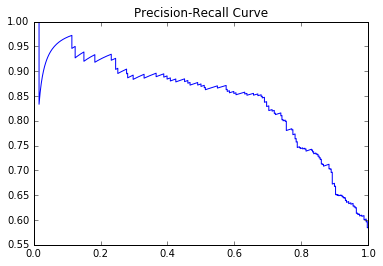

In [16]:
clf = LogisticRegression()
params = {'penalty':['l1', 'l2'], 'C':np.arange(1,10)}
cv = GridSearchCV(clf, params)
cv.fit(X_50_train, y_50_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_50_test, y_50_test))
print(best_clf)
predict_prob_50 = best_clf.predict_proba(X_50_test)
precision_50, recall_50,_ = precision_recall_curve(y_50_test, predict_prob_50[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_50, precision_50)

Final Accuracy:  0.815485996705
LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


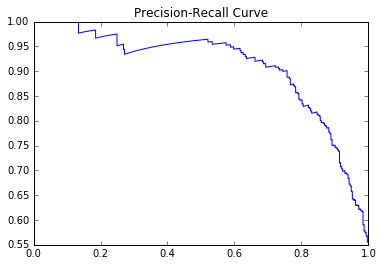

In [17]:
clf = LogisticRegression()
params = {'penalty':['l1', 'l2'], 'C':np.arange(1,10)}
cv = GridSearchCV(clf, params)
cv.fit(X_25_train, y_25_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_25_test, y_25_test))
print(best_clf)
predict_prob_25 = best_clf.predict_proba(X_25_test)
precision_25, recall_25,_ = precision_recall_curve(y_25_test, predict_prob_25[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_25, precision_25)

Final Accuracy:  0.820428336079
LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


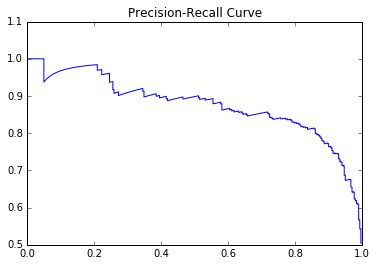

In [18]:
clf = LogisticRegression()
params = {'penalty':['l1', 'l2'], 'C':np.arange(1,10)}
cv = GridSearchCV(clf, params)
cv.fit(X_13_train, y_13_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_13_test, y_13_test))
print(best_clf)
predict_prob_13 = best_clf.predict_proba(X_13_test)
precision_13, recall_13,_ = precision_recall_curve(y_13_test, predict_prob_13[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_13, precision_13)

Final Accuracy:  0.797364085667
LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


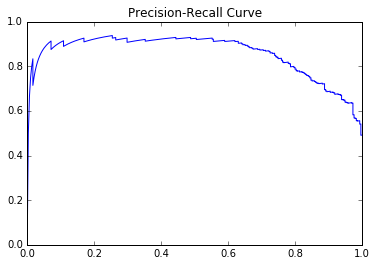

In [19]:
clf = LogisticRegression()
params = {'penalty':['l1', 'l2'], 'C':np.arange(1,10)}
cv = GridSearchCV(clf, params)
cv.fit(X_7_train, y_7_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_7_test, y_7_test))
print(best_clf)
predict_prob_7 = best_clf.predict_proba(X_7_test)
precision_7, recall_7,_ = precision_recall_curve(y_7_test, predict_prob_7[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_7, precision_7)

# Adaboost

Final Accuracy:  0.810543657331
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=150, random_state=None)


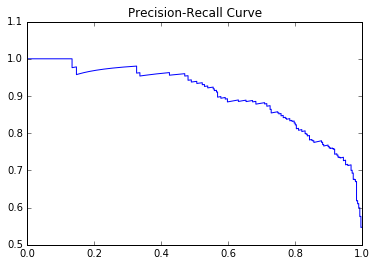

In [24]:
clf = AdaBoostClassifier()
params = {'n_estimators':np.arange(50,200,50)}
cv = GridSearchCV(clf, params)
cv.fit(X_50_train, y_50_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_50_test, y_50_test))
print(best_clf)
predict_prob_50 = best_clf.predict_proba(X_50_test)
precision_50, recall_50,_ = precision_recall_curve(y_50_test, predict_prob_50[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_50, precision_50)

Final Accuracy:  0.827018121911
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=150, random_state=None)


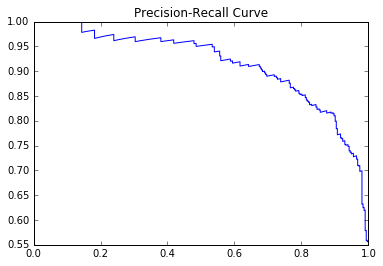

In [25]:
clf = AdaBoostClassifier()
params = {'n_estimators':np.arange(50,200,50)}
cv = GridSearchCV(clf, params)
cv.fit(X_25_train, y_25_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_25_test, y_25_test))
print(best_clf)
predict_prob_25 = best_clf.predict_proba(X_25_test)
precision_25, recall_25,_ = precision_recall_curve(y_25_test, predict_prob_25[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_25, precision_25)

Final Accuracy:  0.812191103789
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)


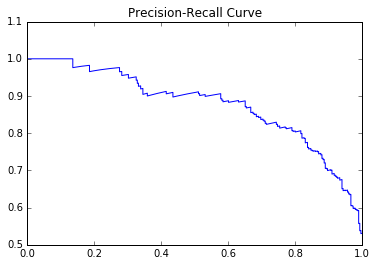

In [26]:
clf = AdaBoostClassifier()
params = {'n_estimators':np.arange(50,200,50)}
cv = GridSearchCV(clf, params)
cv.fit(X_13_train, y_13_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_13_test, y_13_test))
print(best_clf)
predict_prob_13 = best_clf.predict_proba(X_13_test)
precision_13, recall_13,_ = precision_recall_curve(y_13_test, predict_prob_13[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_13, precision_13)

Final Accuracy:  0.771004942339
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=150, random_state=None)


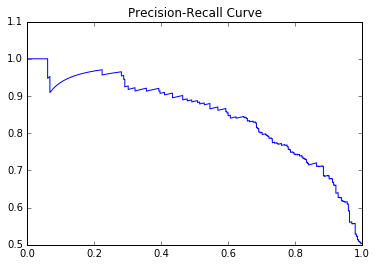

In [27]:
clf = AdaBoostClassifier()
params = {'n_estimators':np.arange(50,200,50)}
cv = GridSearchCV(clf, params)
cv.fit(X_7_train, y_7_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_7_test, y_7_test))
print(best_clf)
predict_prob_7 = best_clf.predict_proba(X_7_test)
precision_7, recall_7,_ = precision_recall_curve(y_7_test, predict_prob_7[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_7, precision_7)

# SVM

Final Accuracy:  0.769357495881
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


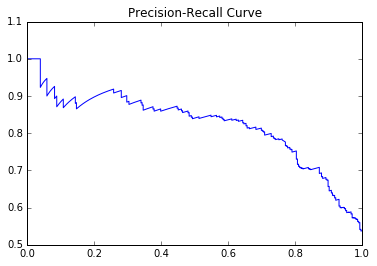

In [29]:
clf = SVC(probability=True)
params = {'C':np.arange(1,2), 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_50_train, y_50_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_50_test, y_50_test))
print(best_clf)
predict_prob_50 = best_clf.predict_proba(X_50_test)
precision_50, recall_50,_ = precision_recall_curve(y_50_test, predict_prob_50[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_50, precision_50)

Final Accuracy:  0.812191103789
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


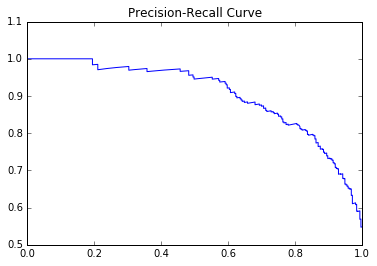

In [30]:
clf = SVC(probability=True)
params = {'C':np.arange(1,5), 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_25_train, y_25_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_25_test, y_25_test))
print(best_clf)
predict_prob_25 = best_clf.predict_proba(X_25_test)
precision_25, recall_25,_ = precision_recall_curve(y_25_test, predict_prob_25[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_25, precision_25)

Final Accuracy:  0.823723228995
SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


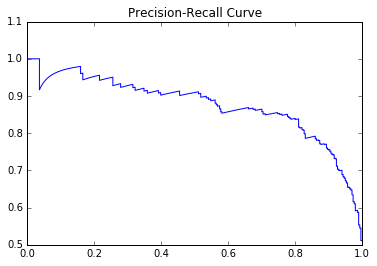

In [31]:
clf = SVC(probability=True)
params = {'C':np.arange(1,5), 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_13_train, y_13_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_13_test, y_13_test))
print(best_clf)
predict_prob_13 = best_clf.predict_proba(X_13_test)
precision_13, recall_13,_ = precision_recall_curve(y_13_test, predict_prob_13[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_13, precision_13)

Final Accuracy:  0.787479406919
SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


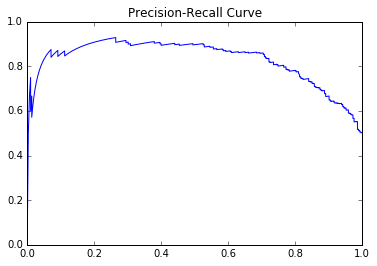

In [32]:
clf = SVC(probability=True)
params = {'C':np.arange(1,5), 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_7_train, y_7_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_7_test, y_7_test))
print(best_clf)
predict_prob_7 = best_clf.predict_proba(X_7_test)
precision_7, recall_7,_ = precision_recall_curve(y_7_test, predict_prob_7[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_7, precision_7)

# GradientBoosting

Final Accuracy:  0.859967051071
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=800, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


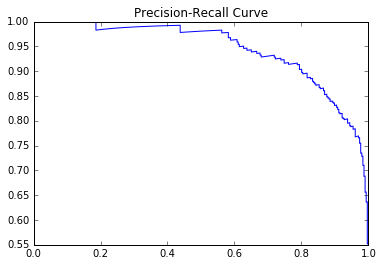

In [20]:
clf = xgb.XGBClassifier()
params = {'n_estimators':np.arange(200,1000,50)}#, 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_50_train, y_50_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_50_test, y_50_test))
print(best_clf)
predict_prob_50 = best_clf.predict_proba(X_50_test)
precision_50, recall_50,_ = precision_recall_curve(y_50_test, predict_prob_50[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_50, precision_50)

Final Accuracy:  0.868204283361
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=750, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


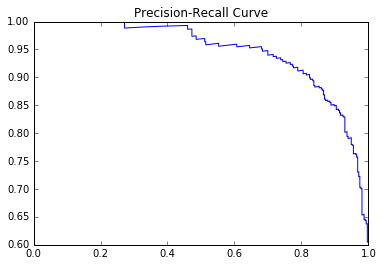

In [21]:
clf = xgb.XGBClassifier()
params = {'n_estimators':np.arange(200,1000,50)}#, 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_25_train, y_25_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_25_test, y_25_test))
print(best_clf)
predict_prob_25 = best_clf.predict_proba(X_25_test)
precision_25, recall_25,_ = precision_recall_curve(y_25_test, predict_prob_25[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_25, precision_25)

Final Accuracy:  0.843492586491
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


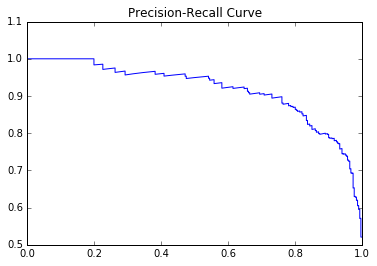

In [22]:
clf = xgb.XGBClassifier()
params = {'n_estimators':np.arange(200,1000,50)}#, 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_13_train, y_13_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_13_test, y_13_test))
print(best_clf)
predict_prob_13 = best_clf.predict_proba(X_13_test)
precision_13, recall_13,_ = precision_recall_curve(y_13_test, predict_prob_13[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_13, precision_13)

Final Accuracy:  0.792421746293
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=900, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


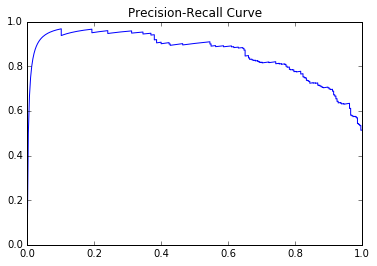

In [23]:
clf = xgb.XGBClassifier()
params = {'n_estimators':np.arange(200,1000,50)}#, 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
cv = GridSearchCV(clf, params)
cv.fit(X_7_train, y_7_train)
best_clf = cv.best_estimator_
print('Final Accuracy: ',best_clf.score(X_7_test, y_7_test))
print(best_clf)
predict_prob_7 = best_clf.predict_proba(X_7_test)
precision_7, recall_7,_ = precision_recall_curve(y_7_test, predict_prob_7[:,1])
plt.title("Precision-Recall Curve")
plt.plot(recall_7, precision_7)